<a href="https://colab.research.google.com/github/LongNguyen1984/TimeSeriesWithPython/blob/main/ShapXgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

wine = pd.read_csv('https://raw.githubusercontent.com/MateLabs/Public-Datasets/master/Datasets/wine.csv')

In [5]:
wine.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,one
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,one
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,one
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,one
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,one


In [7]:
from sklearn.model_selection import train_test_split

X = wine.drop('Class', axis=1)
y = wine['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)

In [9]:
score

0.9722222222222222

## Model interpretation

In [10]:
pip install shap

     |████████████████████████████████| 358kB 3.8MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491630 sha256=8ba32fdae5c67674d7230b5199bd2a0a24b08a9b2c8fbf7bb8f6f73a2f5ce67b
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [66]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

In [63]:
shap.force_plot(explainer.expected_value, shap_values[0])

Exception: ignored

In [60]:

shap.dependence_plot('alcohol', shap_values, X)

TypeError: ignored

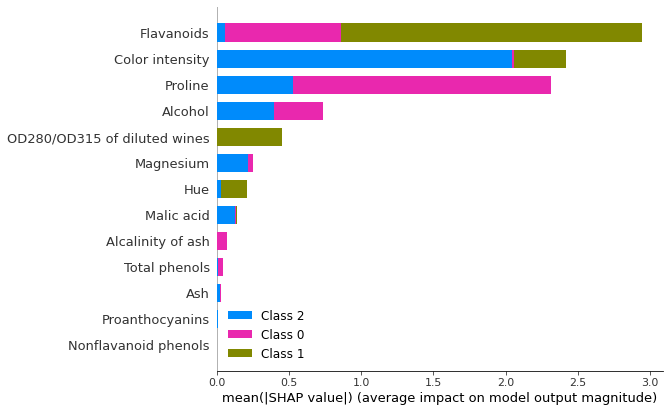

In [61]:
shap.summary_plot(shap_values, X)

In [37]:
X.iloc[0,:]

Alcohol                           14.23
Malic acid                         1.71
Ash                                2.43
Alcalinity of ash                 15.60
Magnesium                        127.00
Total phenols                      2.80
Flavanoids                         3.06
Nonflavanoid phenols               0.28
Proanthocyanins                    2.29
Color intensity                    5.64
Hue                                1.04
OD280/OD315 of diluted wines       3.92
Proline                         1065.00
Name: 0, dtype: float64

In [53]:
import numpy as np

shap_values[0][:]

array([[ 3.4738249e-01, -1.6020137e-03, -2.8617240e-03, ...,
         0.0000000e+00,  0.0000000e+00,  2.2446394e+00],
       [ 3.3019307e-01, -1.6020137e-03, -2.8617240e-03, ...,
         0.0000000e+00,  0.0000000e+00,  2.2500315e+00],
       [ 3.3019307e-01, -1.6020137e-03, -2.8617240e-03, ...,
         0.0000000e+00,  0.0000000e+00,  2.2916641e+00],
       ...,
       [ 1.9717267e-01,  6.4298324e-03, -2.8617240e-03, ...,
         0.0000000e+00,  0.0000000e+00,  1.5616760e+00],
       [ 1.9717267e-01, -1.6020137e-03, -2.8617240e-03, ...,
         0.0000000e+00,  0.0000000e+00,  1.5697079e+00],
       [ 1.8738088e-01,  2.0176813e-02, -7.5172526e-03, ...,
         0.0000000e+00,  0.0000000e+00, -1.6549389e+00]], dtype=float32)